In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
import warnings
from pathlib import Path
RANDOM_STATE = 27
plt.style.use('bmh')
pd.set_option("display.max_columns", 100)
warnings.filterwarnings('ignore')

In [6]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
set_config(display='diagram')


In [10]:
from ipynb.fs.full.AnalysisTools import nullInfo,nullInfoCompare, dropColumns

In [15]:
train_features = pd.read_csv("data/train_values.csv", index_col="building_id")
train_labels = pd.read_csv("data/train_labels.csv", index_col="building_id")
test_features = pd.read_csv("data/test_values.csv", index_col="building_id")

In [16]:
print(train_features.shape, train_labels.shape,test_features.shape)

(260601, 38) (260601, 1) (86868, 38)


In [17]:
df = pd.merge(train_features, train_labels, left_index=True, right_index=True)

In [18]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

<AxesSubplot:ylabel='building_id'>

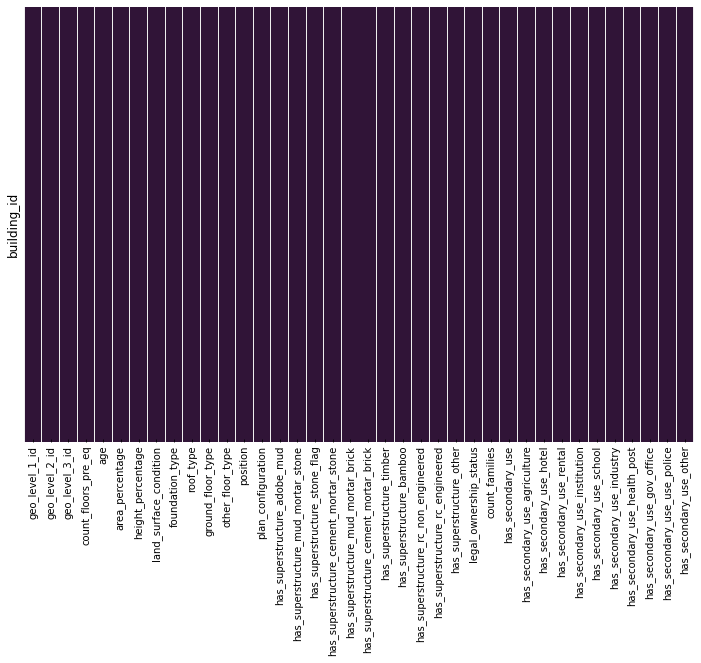

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(train_features.isnull(),  yticklabels=False, cbar=False, cmap='twilight_shifted')

<AxesSubplot:ylabel='building_id'>

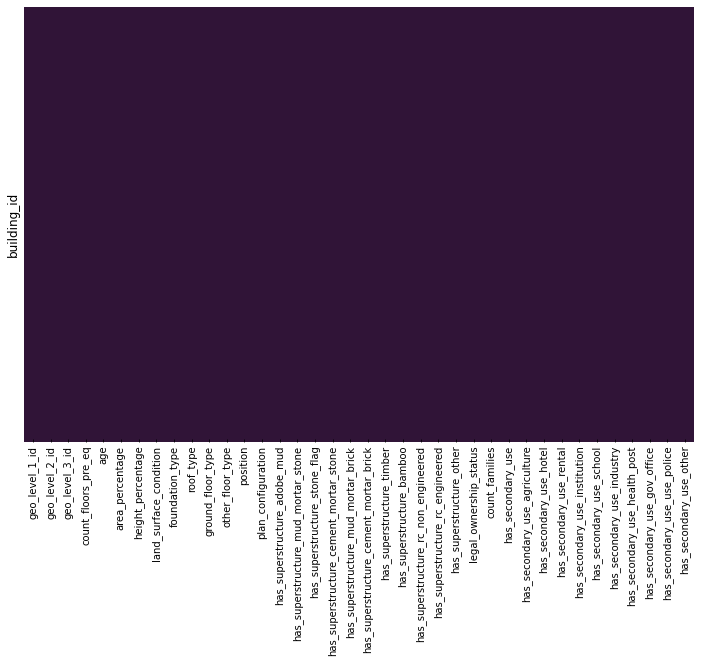

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(test_features.isnull(), yticklabels=False, cbar=False, cmap='twilight_shifted')

In [21]:
nullInfo(train_features)

,colName,dataType,uniqueEntries,nullEntries,nullPercentage
0,geo_level_1_id,int64,31,0,0.0
1,geo_level_2_id,int64,1414,0,0.0
2,geo_level_3_id,int64,11595,0,0.0
3,count_floors_pre_eq,int64,9,0,0.0
4,age,int64,42,0,0.0
5,area_percentage,int64,84,0,0.0
6,height_percentage,int64,27,0,0.0
7,land_surface_condition,object,3,0,0.0
8,foundation_type,object,5,0,0.0
9,roof_type,object,3,0,0.0


In [22]:
nullInfo(test_features)

,colName,dataType,uniqueEntries,nullEntries,nullPercentage
0,geo_level_1_id,int64,31,0,0.0
1,geo_level_2_id,int64,1364,0,0.0
2,geo_level_3_id,int64,10213,0,0.0
3,count_floors_pre_eq,int64,8,0,0.0
4,age,int64,36,0,0.0
5,area_percentage,int64,73,0,0.0
6,height_percentage,int64,28,0,0.0
7,land_surface_condition,object,3,0,0.0
8,foundation_type,object,5,0,0.0
9,roof_type,object,3,0,0.0


In [23]:
nullInfo(train_labels)

,colName,dataType,uniqueEntries,nullEntries,nullPercentage
0,damage_grade,int64,3,0,0.0


In [29]:
corr_matrix = df.corr()

<AxesSubplot:>

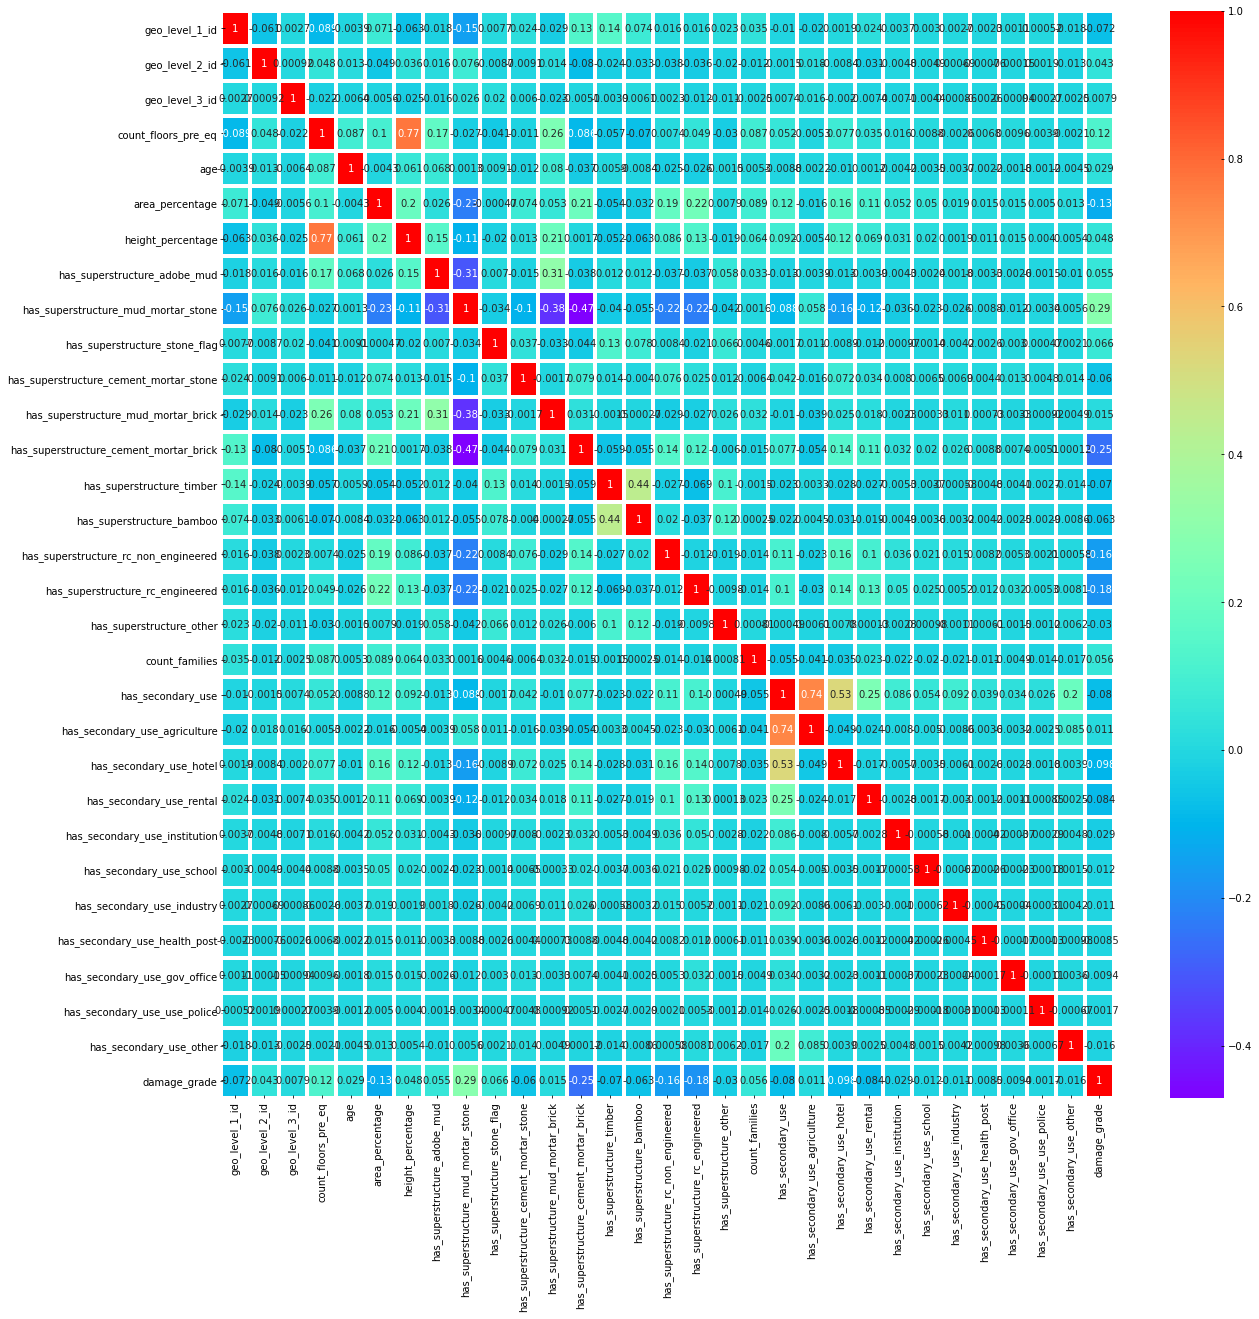

In [39]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,cmap="rainbow", annot=True,linewidths=3)

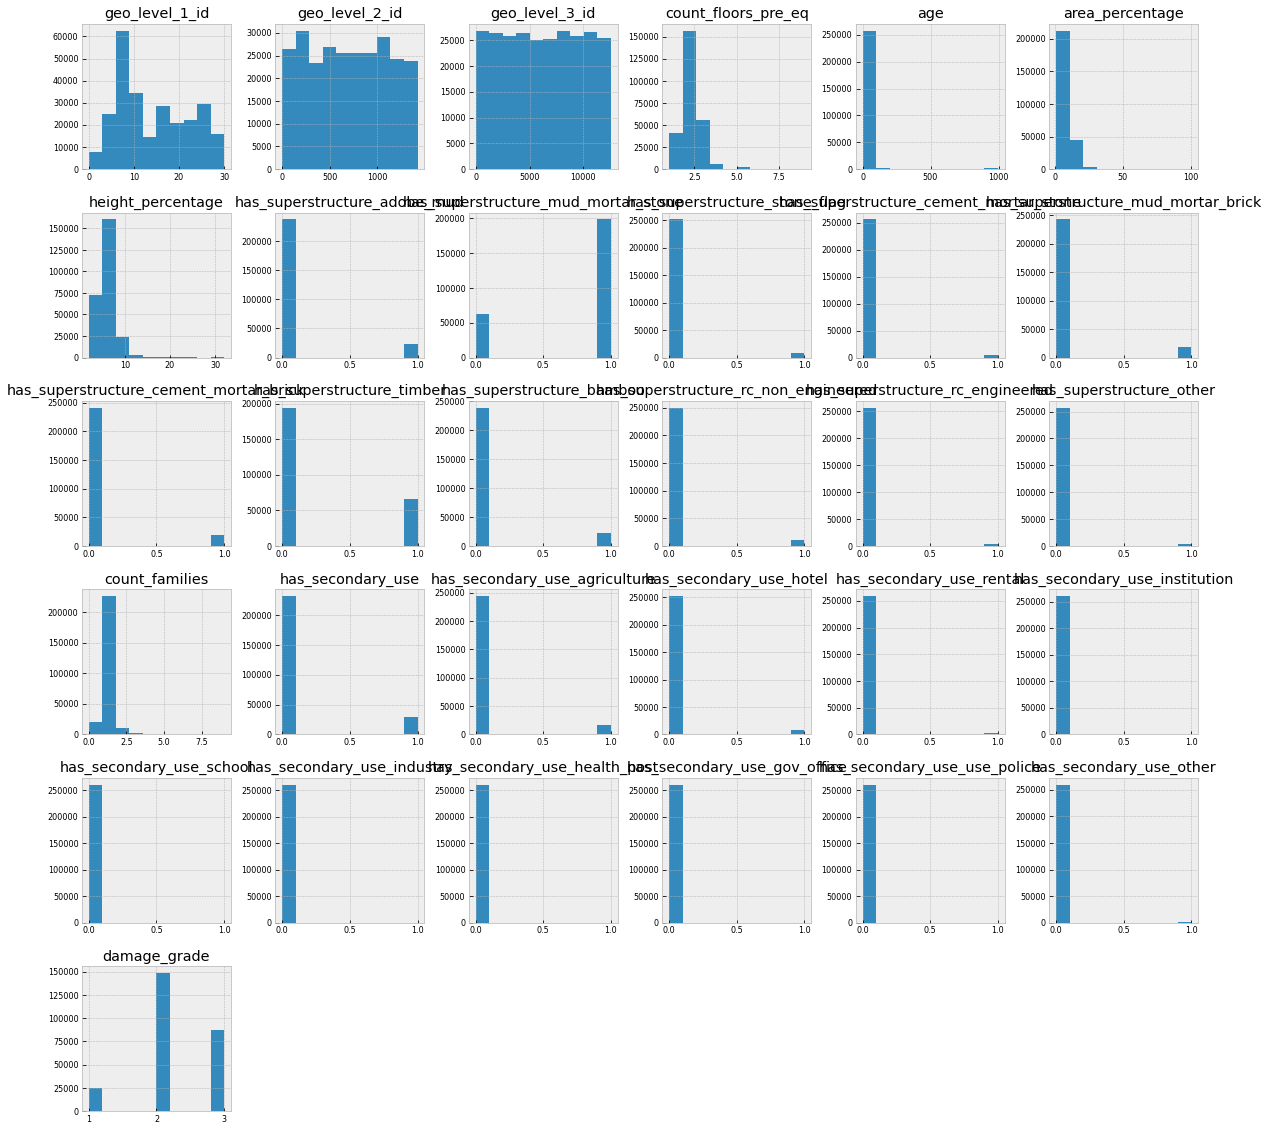

In [41]:
df.hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8);

In [53]:
X = train_features
y = train_labels 

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    shuffle=True,
    stratify=y,
    random_state=27) 

In [57]:
numeric_cols = train_features.columns[train_features.dtypes != "object"].values
object_cols = train_features.columns[train_features.dtypes == "object"].values


In [59]:
from catboost import CatBoostClassifier
rf_classifier =CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                                  cat_features=object_cols,
                           loss_function='Logloss',
                           verbose=True)

rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
accuracy_score(y_test, rf_predictions)


CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/private/libs/target/target_converter.cpp:380: Target with classes must contain only 2 unique values for binary classification

In [ ]:
# df_test_transformed = encoder.transform(test_features_df)
test_probas = rf_classifier.predict(test_features)
test_probas

In [ ]:
submission_df = pd.read_csv("SubmissionFormat.csv", index_col="id")

In [ ]:
submission_df.head()

In [ ]:
 Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["status_group"] = test_probas

submission_df.head()

In [ ]:
submission_df.to_csv('my_submission.csv', index=True)